<a href="https://colab.research.google.com/github/yair040/AI_Course_Ramat_Gan-/blob/main/Lesson37_Fashion_MNIST_Classification/Fashion_MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion-MNIST Classification with Fully Connected Neural Network

**Author:** Yair Levi  
**Platform:** Google Colab  
**Date:** February 2026

This notebook implements a fully connected neural network for classifying fashion items from the Fashion-MNIST dataset.

## 1. Setup and Imports

First, we'll import all necessary libraries for data processing, model building, training, and visualization.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# TensorFlow and Keras imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

TensorFlow version: 2.19.0
Keras version: 3.10.0


## 2. Understanding Fashion-MNIST Dataset

Fashion-MNIST is a dataset of Zalando's article images consisting of:
- **Training set:** 60,000 images
- **Test set:** 10,000 images
- **Image size:** 28×28 pixels
- **Color:** Grayscale (single channel)
- **Classes:** 10 fashion categories

### 2.1 Load the Dataset

Keras provides a built-in function to load Fashion-MNIST. The dataset is already split into training and test sets.

In [2]:
# Load Fashion-MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Display dataset information
print(f"Training set shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")
print(f"\nNumber of classes: {len(class_names)}")
print(f"Pixel value range: {X_train.min()} to {X_train.max()}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training set shape: (60000, 28, 28)
Training labels shape: (60000,)
Test set shape: (10000, 28, 28)
Test labels shape: (10000,)

Number of classes: 10
Pixel value range: 0 to 255


### 2.2 Visualize Sample Images

Let's display sample images from each category to understand what we're working with.

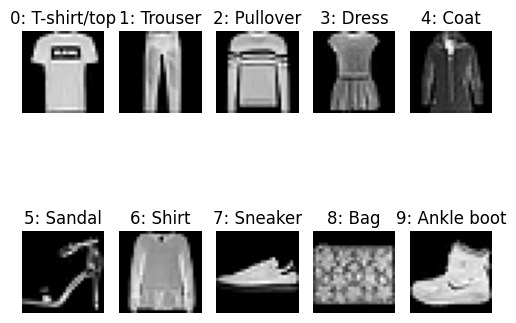

In [7]:
# Display sample images from each class
plt.figure(figsize=(5, 5) )
for i in range(10):
    # Find first occurrence of each class
    idx = np.where(y_train == i)[0][0]
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.title(f'{i}: {class_names[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

### 2.3 Class Distribution

Let's check if the dataset is balanced across all classes.

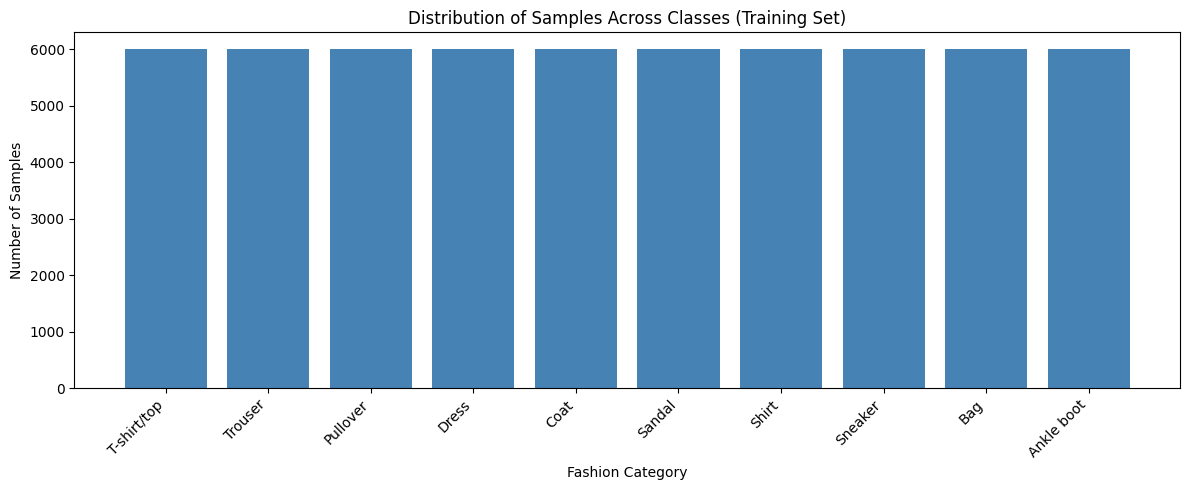

Samples per class:
T-shirt/top    :  6000
Trouser        :  6000
Pullover       :  6000
Dress          :  6000
Coat           :  6000
Sandal         :  6000
Shirt          :  6000
Sneaker        :  6000
Bag            :  6000
Ankle boot     :  6000


In [8]:
# Count samples per class
unique, counts = np.unique(y_train, return_counts=True)

plt.figure(figsize=(12, 5))
plt.bar(class_names, counts, color='steelblue')
plt.xlabel('Fashion Category')
plt.ylabel('Number of Samples')
plt.title('Distribution of Samples Across Classes (Training Set)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Samples per class:")
for name, count in zip(class_names, counts):
    print(f"{name:15s}: {count:5d}")

## 3. Data Preprocessing

We need to prepare the data before feeding it to the neural network:
1. **Normalization:** Scale pixel values from [0, 255] to [0, 1]
2. **Flattening:** Convert 2D images (28×28) to 1D vectors (784)
3. **Label Encoding:** Convert integer labels to one-hot encoded vectors

### 3.1 Normalization

Normalizing input values helps neural networks converge faster and perform better.

In [9]:
# Normalize pixel values from [0, 255] to [0, 1]
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

print(f"Original pixel range: [{X_train.min()}, {X_train.max()}]")
print(f"Normalized pixel range: [{X_train_normalized.min()}, {X_train_normalized.max()}]")

Original pixel range: [0, 255]
Normalized pixel range: [0.0, 1.0]


### 3.2 Flattening

We'll use Keras' Flatten layer in the model, but let's understand the transformation.
Each 28×28 image becomes a 784-dimensional vector.

In [10]:
# Demonstrate flattening (we'll use Flatten layer in the model)
sample_image = X_train_normalized[0]
flattened_sample = sample_image.flatten()

print(f"Original image shape: {sample_image.shape}")
print(f"Flattened vector shape: {flattened_sample.shape}")
print(f"Number of features: {28 * 28} = {flattened_sample.shape[0]}")

Original image shape: (28, 28)
Flattened vector shape: (784,)
Number of features: 784 = 784


### 3.3 Label Encoding (One-Hot Encoding)

Convert integer labels (0-9) to one-hot encoded vectors for multi-class classification.
This allows us to compare the network's probability distribution output with the true label.

In [11]:
# Convert labels to one-hot encoding
y_train_encoded = to_categorical(y_train, 10)
y_test_encoded = to_categorical(y_test, 10)

# Demonstrate one-hot encoding
print("Example transformations:")
for i in range(2):
    print(f"Original label: {y_train[i]} ({class_names[y_train[i]]})")
    print(f"One-hot encoded: {y_train_encoded[i]}")
    print()

Example transformations:
Original label: 9 (Ankle boot)
One-hot encoded: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]

Original label: 0 (T-shirt/top)
One-hot encoded: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]



## 4. Build Neural Network Architecture

We'll create a fully connected neural network with:
- **Input layer:** 784 neurons (28×28 flattened)
- **Hidden layers:** Configurable (default: 2 layers with 128 and 64 neurons)
- **Output layer:** 10 neurons (one per class)

**Activation Functions:**
- Hidden layers: ReLU (Rectified Linear Unit)
- Output layer: Softmax (produces probability distribution)

**Loss Function:** Categorical Cross-Entropy

### 4.1 Model Configuration Parameters

In [12]:
# Model architecture parameters (user-configurable)
HIDDEN_LAYERS = [128, 64]  # Number of neurons in each hidden layer
LEARNING_RATE = 0.001
EPOCHS = 20
BATCH_SIZE = 128
VALIDATION_SPLIT = 0.15

print("Model Configuration:")
print(f"Hidden layers: {HIDDEN_LAYERS}")
print(f"Learning rate: {LEARNING_RATE}")
print(f"Epochs: {EPOCHS}")
print(f"Batch size: {BATCH_SIZE}")
print(f"Validation split: {VALIDATION_SPLIT}")

Model Configuration:
Hidden layers: [128, 64]
Learning rate: 0.001
Epochs: 20
Batch size: 128
Validation split: 0.15


### 4.2 Build the Model

We'll create a function to build the model so we can easily experiment with different architectures.

In [13]:
def build_model(hidden_layers=[128, 64], learning_rate=0.001):
    """
    Build a fully connected neural network for Fashion-MNIST classification.

    Args:
        hidden_layers (list): Number of neurons in each hidden layer
        learning_rate (float): Learning rate for Adam optimizer

    Returns:
        model: Compiled Keras model
    """
    model = Sequential()

    # Input layer: Flatten 28x28 images to 784-dimensional vectors
    model.add(Flatten(input_shape=(28, 28)))

    # Hidden layers with ReLU activation
    for neurons in hidden_layers:
        model.add(Dense(neurons, activation='relu'))

    # Output layer: 10 neurons with Softmax activation
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Build the baseline model
model = build_model(hidden_layers=HIDDEN_LAYERS, learning_rate=LEARNING_RATE)

# Display model architecture
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

## 5. Training the Model

We'll train the model using:
- **Optimizer:** Adam (Adaptive Moment Estimation)
- **Loss Function:** Categorical Cross-Entropy
- **Backpropagation:** Gradient descent with adaptive learning rates

The training data is automatically split:
- 85% for training (51,000 images)
- 15% for validation (9,000 images)

In [14]:
# Train the model
print("Training the model...\n")

history = model.fit(
    X_train_normalized,
    y_train_encoded,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=VALIDATION_SPLIT,
    verbose=1
)

print("\nTraining complete!")

Training the model...

Epoch 1/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7284 - loss: 0.7963 - val_accuracy: 0.8376 - val_loss: 0.4584
Epoch 2/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8514 - loss: 0.4179 - val_accuracy: 0.8543 - val_loss: 0.4081
Epoch 3/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8686 - loss: 0.3650 - val_accuracy: 0.8684 - val_loss: 0.3806
Epoch 4/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8765 - loss: 0.3351 - val_accuracy: 0.8721 - val_loss: 0.3643
Epoch 5/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8858 - loss: 0.3117 - val_accuracy: 0.8742 - val_loss: 0.3512
Epoch 6/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8908 - loss: 0.2956 - val_accuracy: 0.8741 - val_loss: 0.3507
Epoch 7/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8961 - loss: 0.2822 - val_accuracy: 0.8774 - val_loss: 0.3448
Epoch 8/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9008 - loss: 0.

### 5.1 Visualize Training Progress

Plot the training and validation loss and accuracy over epochs to understand model convergence.

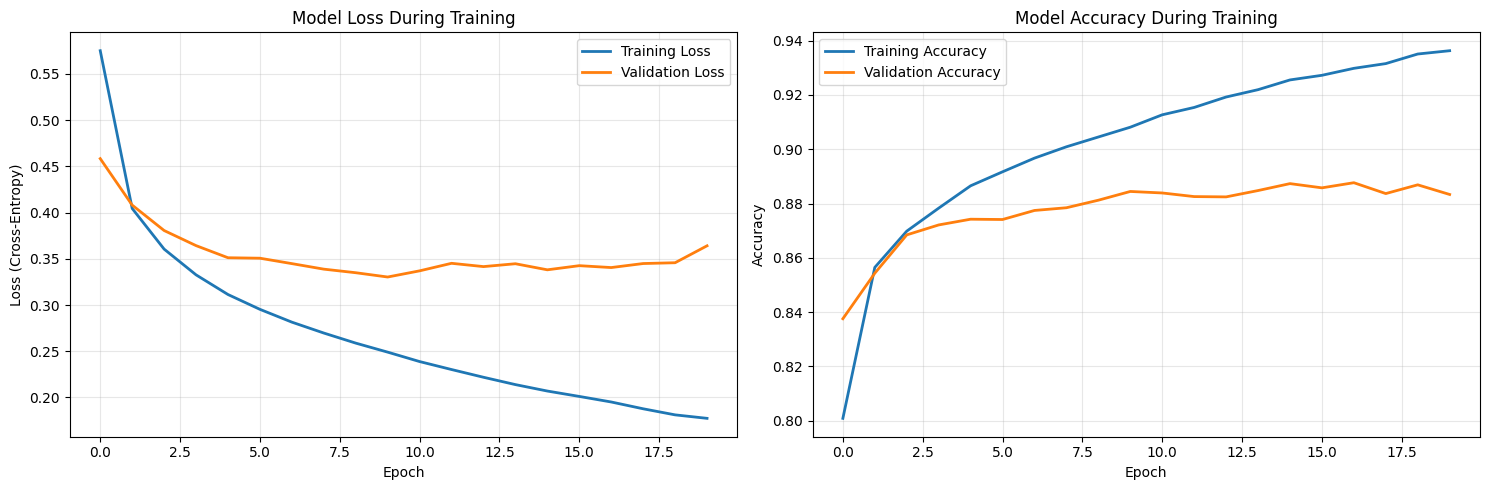


Final Training Accuracy: 0.9363
Final Validation Accuracy: 0.8833
Final Training Loss: 0.1774
Final Validation Loss: 0.3641


In [15]:
# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot loss
axes[0].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss (Cross-Entropy)')
axes[0].set_title('Model Loss During Training')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot accuracy
axes[1].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Model Accuracy During Training')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print final metrics
print(f"\nFinal Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Final Training Loss: {history.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {history.history['val_loss'][-1]:.4f}")

## 6. Testing and Evaluation

Now we'll evaluate the model on the test set and analyze its performance.

### 6.1 Overall Test Performance

In [16]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=0)

print("="*50)
print("TEST SET PERFORMANCE")
print("="*50)
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Test Loss: {test_loss:.4f}")
print("="*50)

TEST SET PERFORMANCE
Test Accuracy: 0.8804 (88.04%)
Test Loss: 0.3891


### 6.2 Visual Predictions

Let's visualize some predictions to see how well the model performs on individual images.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


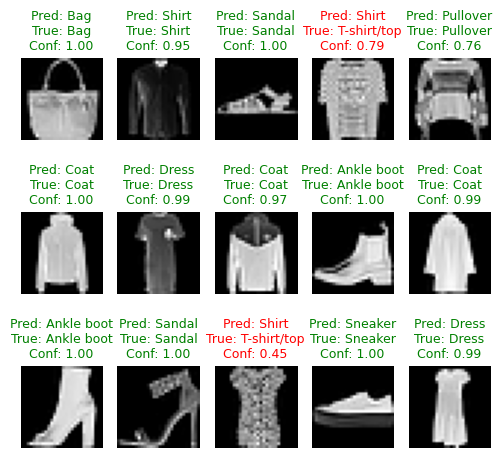

In [18]:
# Make predictions on test set
predictions = model.predict(X_test_normalized)
predicted_classes = np.argmax(predictions, axis=1)

# Display predictions for random test samples
num_samples = 15
random_indices = np.random.choice(len(X_test), num_samples, replace=False)

plt.figure(figsize=(5, 5))
for i, idx in enumerate(random_indices):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[idx], cmap='gray')

    predicted_label = predicted_classes[idx]
    true_label = y_test[idx]
    confidence = predictions[idx][predicted_label]

    # Color: green if correct, red if incorrect
    color = 'green' if predicted_label == true_label else 'red'

    title = f"Pred: {class_names[predicted_label]}\n"
    title += f"True: {class_names[true_label]}\n"
    title += f"Conf: {confidence:.2f}"

    plt.title(title, color=color, fontsize=9)
    plt.axis('off')

plt.tight_layout()
plt.show()

### 6.3 Confusion Matrix

The confusion matrix shows how often each class is predicted for each true class.
Diagonal elements represent correct predictions.

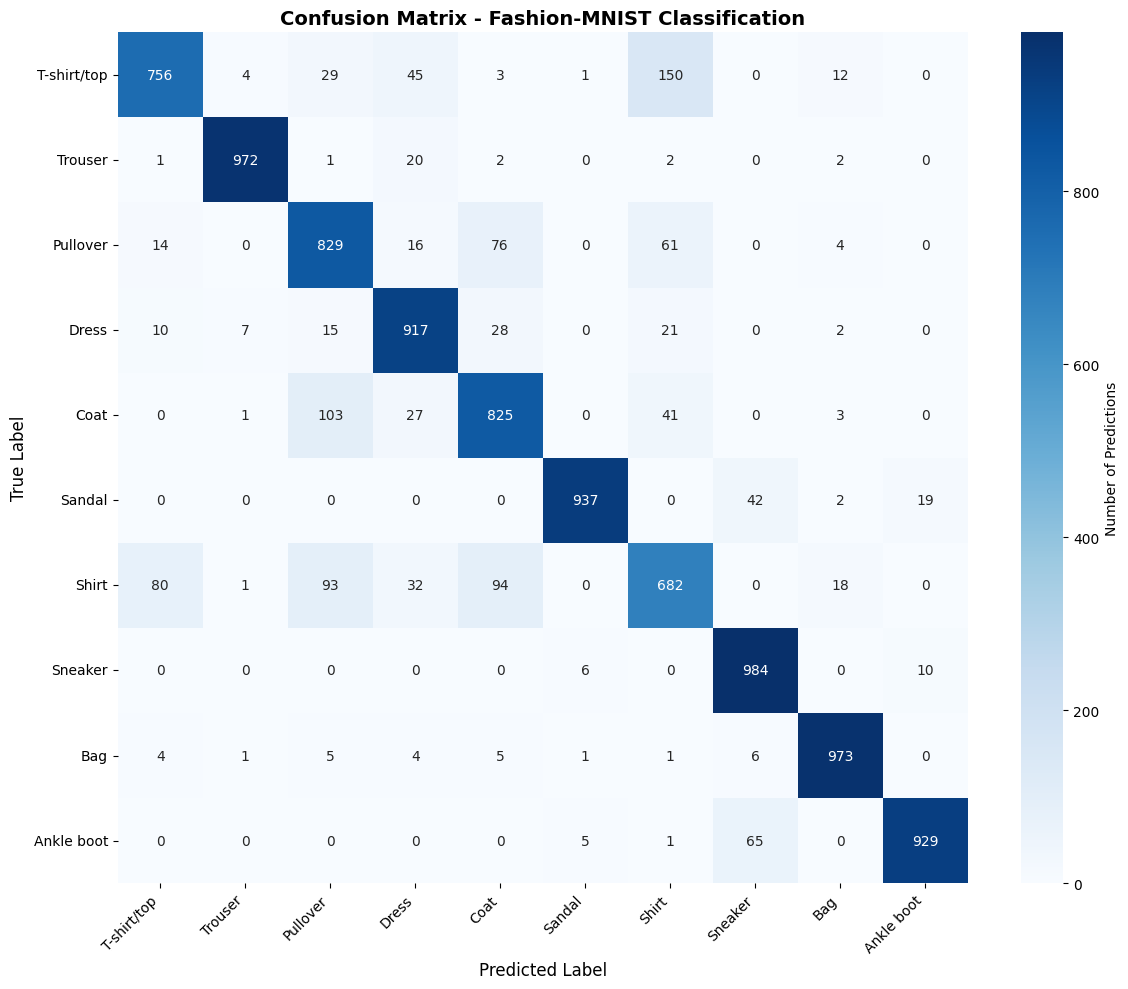


Per-Class Accuracy:
----------------------------------------
T-shirt/top    : 0.7560 (75.60%)
Trouser        : 0.9720 (97.20%)
Pullover       : 0.8290 (82.90%)
Dress          : 0.9170 (91.70%)
Coat           : 0.8250 (82.50%)
Sandal         : 0.9370 (93.70%)
Shirt          : 0.6820 (68.20%)
Sneaker        : 0.9840 (98.40%)
Bag            : 0.9730 (97.30%)
Ankle boot     : 0.9290 (92.90%)
----------------------------------------
Overall Accuracy: 0.8804 (88.04%)


In [19]:
# Generate confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Number of Predictions'})
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix - Fashion-MNIST Classification', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Calculate per-class accuracy
class_accuracy = cm.diagonal() / cm.sum(axis=1)

print("\nPer-Class Accuracy:")
print("-" * 40)
for i, (name, acc) in enumerate(zip(class_names, class_accuracy)):
    print(f"{name:15s}: {acc:.4f} ({acc*100:.2f}%)")
print("-" * 40)
print(f"Overall Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

### 6.4 Error Analysis

Let's analyze which classes are most commonly confused with each other.

In [20]:
# Find most common confusions
confusion_pairs = []
for i in range(10):
    for j in range(10):
        if i != j and cm[i, j] > 0:
            confusion_pairs.append((class_names[i], class_names[j], cm[i, j]))

# Sort by frequency
confusion_pairs.sort(key=lambda x: x[2], reverse=True)

print("\nTop 10 Most Common Misclassifications:")
print("="*60)
print(f"{'True Class':<15} {'Predicted As':<15} {'Count':>10}")
print("-"*60)
for true_class, pred_class, count in confusion_pairs[:10]:
    print(f"{true_class:<15} {pred_class:<15} {count:>10}")
print("="*60)


Top 10 Most Common Misclassifications:
True Class      Predicted As         Count
------------------------------------------------------------
T-shirt/top     Shirt                  150
Coat            Pullover               103
Shirt           Coat                    94
Shirt           Pullover                93
Shirt           T-shirt/top             80
Pullover        Coat                    76
Ankle boot      Sneaker                 65
Pullover        Shirt                   61
T-shirt/top     Dress                   45
Sandal          Sneaker                 42


### 6.5 Display Misclassified Examples

Let's visualize some misclassified images to understand why the model failed.

Total misclassified images: 1196 out of 10000
Error rate: 11.96%



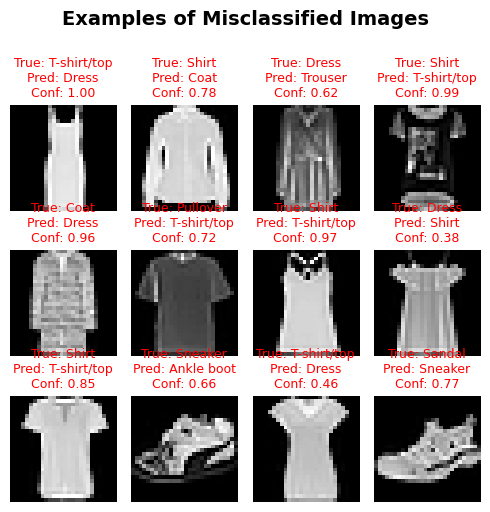

In [22]:
# Find misclassified examples
misclassified_idx = np.where(predicted_classes != y_test)[0]

print(f"Total misclassified images: {len(misclassified_idx)} out of {len(y_test)}")
print(f"Error rate: {len(misclassified_idx)/len(y_test)*100:.2f}%\n")

# Display some misclassified examples
num_examples = 12
sample_misclassified = np.random.choice(misclassified_idx,
                                        min(num_examples, len(misclassified_idx)),
                                        replace=False)

plt.figure(figsize=(5, 5))
for i, idx in enumerate(sample_misclassified):
    plt.subplot(3, 4, i + 1)
    plt.imshow(X_test[idx], cmap='gray')

    predicted_label = predicted_classes[idx]
    true_label = y_test[idx]
    confidence = predictions[idx][predicted_label]

    title = f"True: {class_names[true_label]}\n"
    title += f"Pred: {class_names[predicted_label]}\n"
    title += f"Conf: {confidence:.2f}"

    plt.title(title, color='red', fontsize=9)
    plt.axis('off')

plt.suptitle('Examples of Misclassified Images', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### 6.6 Error Analysis Insights

Based on the confusion matrix and misclassified examples, let's analyze common failure patterns.

In [23]:
print("\nCOMMON MISCLASSIFICATION PATTERNS:")
print("="*70)

# Analyze specific confusion pairs
confusion_analysis = [
    ("Shirt", "T-shirt/top", "Both are upper body garments with similar shapes"),
    ("Pullover", "Coat", "Similar outerwear with overlapping features"),
    ("Pullover", "Shirt", "Upper body garments with similar silhouettes"),
    ("T-shirt/top", "Shirt", "Very similar upper body clothing items"),
    ("Sneaker", "Ankle boot", "Both are footwear with similar shapes"),
    ("Coat", "Pullover", "Outerwear with similar overall shapes"),
]

for true_class, pred_class, reason in confusion_analysis:
    if true_class in class_names and pred_class in class_names:
        true_idx = class_names.index(true_class)
        pred_idx = class_names.index(pred_class)
        count = cm[true_idx, pred_idx]
        if count > 0:
            print(f"\n{true_class} → {pred_class}: {count} cases")
            print(f"  Reason: {reason}")

print("\n" + "="*70)
print("\nKEY INSIGHTS:")
print("1. Clothing items with similar shapes are often confused")
print("2. Upper body garments (Shirt, T-shirt, Pullover, Coat) show overlap")
print("3. Footwear items (Sneaker, Ankle boot, Sandal) can be similar")
print("4. 28x28 resolution makes fine details difficult to distinguish")
print("5. Grayscale images lose color information that could help classification")


COMMON MISCLASSIFICATION PATTERNS:

Shirt → T-shirt/top: 80 cases
  Reason: Both are upper body garments with similar shapes

Pullover → Coat: 76 cases
  Reason: Similar outerwear with overlapping features

Pullover → Shirt: 61 cases
  Reason: Upper body garments with similar silhouettes

T-shirt/top → Shirt: 150 cases
  Reason: Very similar upper body clothing items

Sneaker → Ankle boot: 10 cases
  Reason: Both are footwear with similar shapes

Coat → Pullover: 103 cases
  Reason: Outerwear with similar overall shapes


KEY INSIGHTS:
1. Clothing items with similar shapes are often confused
2. Upper body garments (Shirt, T-shirt, Pullover, Coat) show overlap
3. Footwear items (Sneaker, Ankle boot, Sandal) can be similar
4. 28x28 resolution makes fine details difficult to distinguish
5. Grayscale images lose color information that could help classification


## 7. Model Improvement Experiments

Now let's experiment with different network configurations to try to improve performance.

### 7.1 Experiment 1: Deeper Network (More Layers)

We'll increase the number of hidden layers to allow the network to learn more complex feature hierarchies.

In [24]:
# Build a deeper model
DEEPER_LAYERS = [128, 128, 64, 64]  # 4 hidden layers instead of 2

print("Building deeper network...")
model_deeper = build_model(hidden_layers=DEEPER_LAYERS, learning_rate=LEARNING_RATE)
model_deeper.summary()

# Train the deeper model
print("\nTraining deeper network...")
history_deeper = model_deeper.fit(
    X_train_normalized,
    y_train_encoded,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=VALIDATION_SPLIT,
    verbose=1
)

# Evaluate
test_loss_deeper, test_accuracy_deeper = model_deeper.evaluate(
    X_test_normalized, y_test_encoded, verbose=0
)

print("\n" + "="*50)
print("DEEPER NETWORK RESULTS")
print("="*50)
print(f"Test Accuracy: {test_accuracy_deeper:.4f} ({test_accuracy_deeper*100:.2f}%)")
print(f"Baseline Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Improvement: {(test_accuracy_deeper - test_accuracy)*100:.2f}%")
print("="*50)

Building deeper network...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,058 (508.04 KB)

 Trainable params: 130,058 (508.04 KB)

 Non-trainable params: 0 (0.00 B)


Training deeper network...
Epoch 1/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.7126 - loss: 0.8260 - val_accuracy: 0.8407 - val_loss: 0.4587
Epoch 2/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8556 - loss: 0.4035 - val_accuracy: 0.8534 - val_loss: 0.4098
Epoch 3/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8688 - loss: 0.3571 - val_accuracy: 0.8612 - val_loss: 0.3888
Epoch 4/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8788 - loss: 0.3278 - val_accuracy: 0.8628 - val_loss: 0.3841
Epoch 5/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8882 - loss: 0.3071 - val_accuracy: 0.8698 - val_loss: 0.3648
Epoch 6/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8945 - loss: 0.2886 - val_accuracy: 0.8711 - val_loss: 0.3564
Epoch 7/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8999 - loss: 0.2734 - val_accuracy: 0.8732 - val_loss: 0.3540
Epoch 8/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9023 -

### 7.2 Confusion Matrix for Deeper Network

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


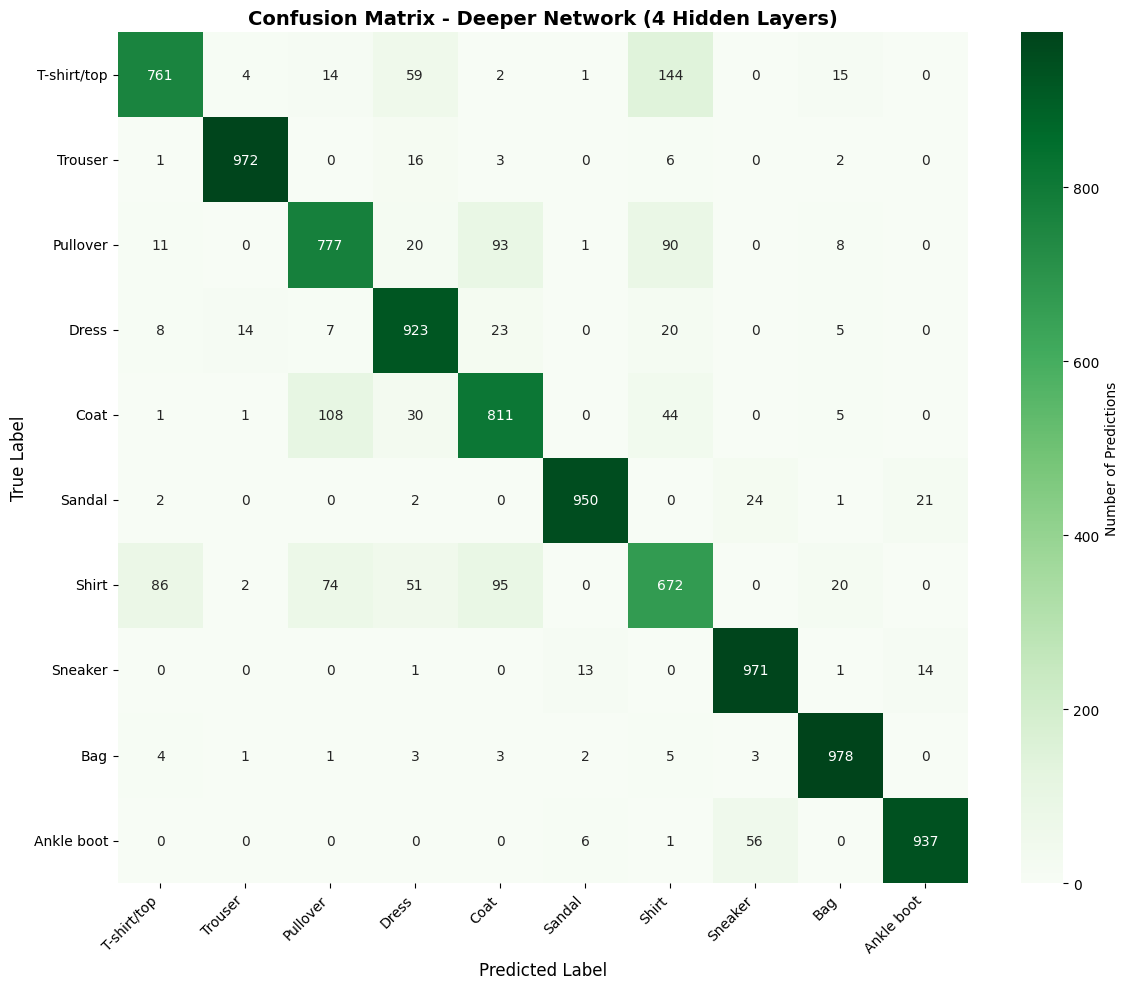


Per-Class Accuracy Comparison:
------------------------------------------------------------
Class               Baseline       Deeper       Change
------------------------------------------------------------
T-shirt/top           75.60%       76.10%        0.50%
Trouser               97.20%       97.20%        0.00%
Pullover              82.90%       77.70%       -5.20%
Dress                 91.70%       92.30%        0.60%
Coat                  82.50%       81.10%       -1.40%
Sandal                93.70%       95.00%        1.30%
Shirt                 68.20%       67.20%       -1.00%
Sneaker               98.40%       97.10%       -1.30%
Bag                   97.30%       97.80%        0.50%
Ankle boot            92.90%       93.70%        0.80%
------------------------------------------------------------


In [25]:
# Generate predictions and confusion matrix
predictions_deeper = model_deeper.predict(X_test_normalized)
predicted_classes_deeper = np.argmax(predictions_deeper, axis=1)
cm_deeper = confusion_matrix(y_test, predicted_classes_deeper)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm_deeper, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Number of Predictions'})
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix - Deeper Network (4 Hidden Layers)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Per-class comparison
class_accuracy_deeper = cm_deeper.diagonal() / cm_deeper.sum(axis=1)

print("\nPer-Class Accuracy Comparison:")
print("-" * 60)
print(f"{'Class':<15} {'Baseline':>12} {'Deeper':>12} {'Change':>12}")
print("-" * 60)
for i, name in enumerate(class_names):
    baseline = class_accuracy[i]
    deeper = class_accuracy_deeper[i]
    change = deeper - baseline
    print(f"{name:<15} {baseline*100:>11.2f}% {deeper*100:>11.2f}% {change*100:>11.2f}%")
print("-" * 60)

### 7.3 Experiment 2: Wider Network (More Neurons)

We'll increase the number of neurons in each layer to give the network more capacity.

In [26]:
# Build a wider model
WIDER_LAYERS = [256, 128]  # Doubled neurons in each layer

print("Building wider network...")
model_wider = build_model(hidden_layers=WIDER_LAYERS, learning_rate=LEARNING_RATE)
model_wider.summary()

# Train the wider model
print("\nTraining wider network...")
history_wider = model_wider.fit(
    X_train_normalized,
    y_train_encoded,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=VALIDATION_SPLIT,
    verbose=1
)

# Evaluate
test_loss_wider, test_accuracy_wider = model_wider.evaluate(
    X_test_normalized, y_test_encoded, verbose=0
)

print("\n" + "="*50)
print("WIDER NETWORK RESULTS")
print("="*50)
print(f"Test Accuracy: {test_accuracy_wider:.4f} ({test_accuracy_wider*100:.2f}%)")
print(f"Baseline Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Improvement: {(test_accuracy_wider - test_accuracy)*100:.2f}%")
print("="*50)

Building wider network...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)


Training wider network...
Epoch 1/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7562 - loss: 0.7093 - val_accuracy: 0.8508 - val_loss: 0.4205
Epoch 2/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8599 - loss: 0.3908 - val_accuracy: 0.8657 - val_loss: 0.3824
Epoch 3/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8757 - loss: 0.3426 - val_accuracy: 0.8734 - val_loss: 0.3591
Epoch 4/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8846 - loss: 0.3132 - val_accuracy: 0.8740 - val_loss: 0.3511
Epoch 5/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8925 - loss: 0.2906 - val_accuracy: 0.8770 - val_loss: 0.3401
Epoch 6/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8992 - loss: 0.2711 - val_accuracy: 0.8810 - val_loss: 0.3391
Epoch 7/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9048 - loss: 0.2576 - val_accuracy: 0.8809 - val_loss: 0.3405
Epoch 8/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9093 - 

### 7.4 Confusion Matrix for Wider Network

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


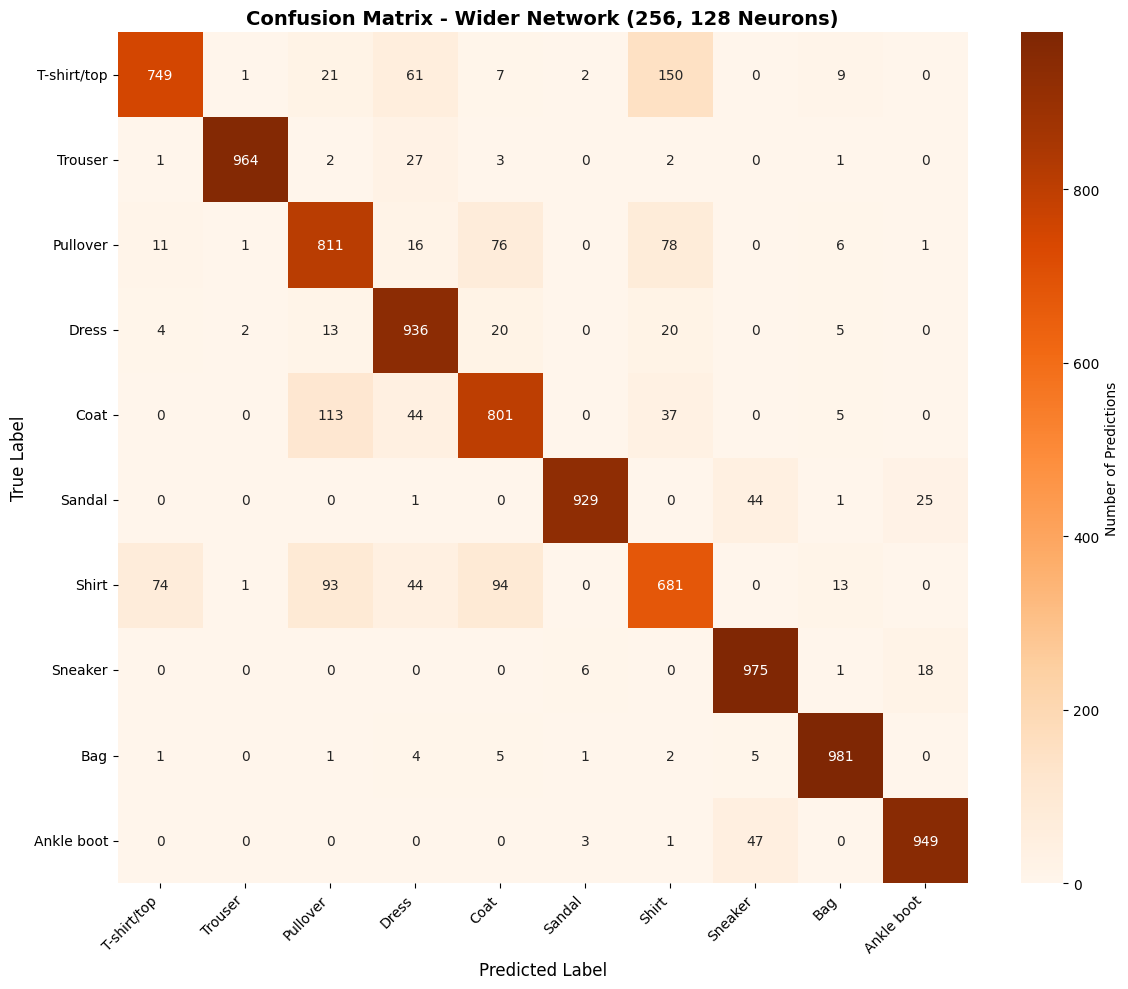


Per-Class Accuracy Comparison:
------------------------------------------------------------
Class               Baseline        Wider       Change
------------------------------------------------------------
T-shirt/top           75.60%       74.90%       -0.70%
Trouser               97.20%       96.40%       -0.80%
Pullover              82.90%       81.10%       -1.80%
Dress                 91.70%       93.60%        1.90%
Coat                  82.50%       80.10%       -2.40%
Sandal                93.70%       92.90%       -0.80%
Shirt                 68.20%       68.10%       -0.10%
Sneaker               98.40%       97.50%       -0.90%
Bag                   97.30%       98.10%        0.80%
Ankle boot            92.90%       94.90%        2.00%
------------------------------------------------------------


In [27]:
# Generate predictions and confusion matrix
predictions_wider = model_wider.predict(X_test_normalized)
predicted_classes_wider = np.argmax(predictions_wider, axis=1)
cm_wider = confusion_matrix(y_test, predicted_classes_wider)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm_wider, annot=True, fmt='d', cmap='Oranges',
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Number of Predictions'})
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix - Wider Network (256, 128 Neurons)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Per-class comparison
class_accuracy_wider = cm_wider.diagonal() / cm_wider.sum(axis=1)

print("\nPer-Class Accuracy Comparison:")
print("-" * 60)
print(f"{'Class':<15} {'Baseline':>12} {'Wider':>12} {'Change':>12}")
print("-" * 60)
for i, name in enumerate(class_names):
    baseline = class_accuracy[i]
    wider = class_accuracy_wider[i]
    change = wider - baseline
    print(f"{name:<15} {baseline*100:>11.2f}% {wider*100:>11.2f}% {change*100:>11.2f}%")
print("-" * 60)

### 7.5 Experiment 3: Model with Dropout (Regularization)

Let's try adding dropout layers to prevent overfitting.

In [28]:
def build_model_with_dropout(hidden_layers=[128, 64], dropout_rate=0.3, learning_rate=0.001):
    """
    Build a fully connected neural network with dropout regularization.
    """
    model = Sequential()

    # Input layer
    model.add(Flatten(input_shape=(28, 28)))

    # Hidden layers with dropout
    for neurons in hidden_layers:
        model.add(Dense(neurons, activation='relu'))
        model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(10, activation='softmax'))

    # Compile
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Build model with dropout
print("Building network with dropout regularization...")
model_dropout = build_model_with_dropout(
    hidden_layers=[256, 128],
    dropout_rate=0.3,
    learning_rate=LEARNING_RATE
)
model_dropout.summary()

# Train
print("\nTraining network with dropout...")
history_dropout = model_dropout.fit(
    X_train_normalized,
    y_train_encoded,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=VALIDATION_SPLIT,
    verbose=1
)

# Evaluate
test_loss_dropout, test_accuracy_dropout = model_dropout.evaluate(
    X_test_normalized, y_test_encoded, verbose=0
)

print("\n" + "="*50)
print("DROPOUT NETWORK RESULTS")
print("="*50)
print(f"Test Accuracy: {test_accuracy_dropout:.4f} ({test_accuracy_dropout*100:.2f}%)")
print(f"Baseline Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Improvement: {(test_accuracy_dropout - test_accuracy)*100:.2f}%")
print("="*50)

Building network with dropout regularization...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)


Training network with dropout...
Epoch 1/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.6947 - loss: 0.8675 - val_accuracy: 0.8456 - val_loss: 0.4323
Epoch 2/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8361 - loss: 0.4557 - val_accuracy: 0.8594 - val_loss: 0.3833
Epoch 3/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8525 - loss: 0.4048 - val_accuracy: 0.8694 - val_loss: 0.3581
Epoch 4/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8648 - loss: 0.3723 - val_accuracy: 0.8690 - val_loss: 0.3541
Epoch 5/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8680 - loss: 0.3575 - val_accuracy: 0.8734 - val_loss: 0.3465
Epoch 6/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8719 - loss: 0.3468 - val_accuracy: 0.8770 - val_loss: 0.3377
Epoch 7/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8797 - loss: 0.3315 - val_accuracy: 0.8779 - val_loss: 0.3295
Epoch 8/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy

### 7.6 Final Comparison of All Models

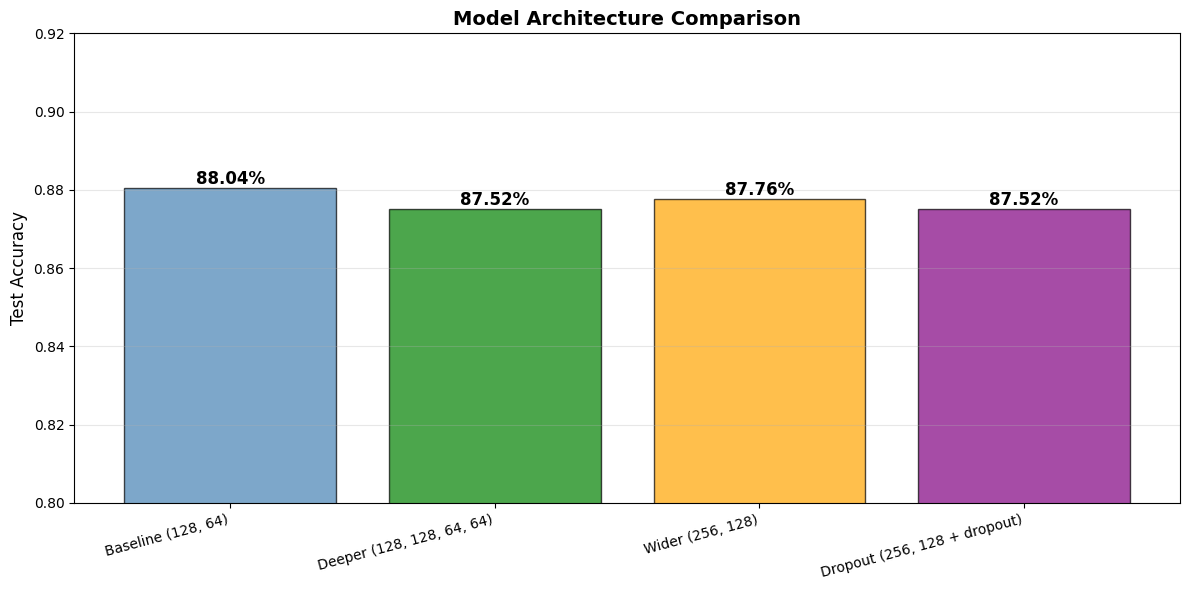


FINAL MODEL COMPARISON
Model                                   Accuracy     vs Baseline
----------------------------------------------------------------------
Baseline (128, 64)                        88.04%           0.00%
Deeper (128, 128, 64, 64)                 87.52%          -0.52%
Wider (256, 128)                          87.76%          -0.28%
Dropout (256, 128 + dropout)              87.52%          -0.52%

Best Model: Baseline (128, 64)
Best Accuracy: 88.04%
Improvement over baseline: 0.00%


In [29]:
# Compile all results
results = {
    'Baseline (128, 64)': test_accuracy,
    'Deeper (128, 128, 64, 64)': test_accuracy_deeper,
    'Wider (256, 128)': test_accuracy_wider,
    'Dropout (256, 128 + dropout)': test_accuracy_dropout
}

# Create comparison bar chart
plt.figure(figsize=(12, 6))
models = list(results.keys())
accuracies = list(results.values())
colors = ['steelblue', 'green', 'orange', 'purple']

bars = plt.bar(models, accuracies, color=colors, alpha=0.7, edgecolor='black')

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{acc*100:.2f}%',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.ylabel('Test Accuracy', fontsize=12)
plt.title('Model Architecture Comparison', fontsize=14, fontweight='bold')
plt.xticks(rotation=15, ha='right')
plt.ylim(0.8, 0.92)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Print detailed comparison
print("\n" + "="*70)
print("FINAL MODEL COMPARISON")
print("="*70)
print(f"{'Model':<35} {'Accuracy':>12} {'vs Baseline':>15}")
print("-"*70)
baseline_acc = test_accuracy
for model_name, acc in results.items():
    diff = (acc - baseline_acc) * 100
    print(f"{model_name:<35} {acc*100:>11.2f}% {diff:>14.2f}%")
print("="*70)

# Find best model
best_model = max(results, key=results.get)
best_accuracy = results[best_model]
print(f"\nBest Model: {best_model}")
print(f"Best Accuracy: {best_accuracy*100:.2f}%")
print(f"Improvement over baseline: {(best_accuracy - baseline_acc)*100:.2f}%")

## 8. Conclusions and Insights

### Key Findings:

1. **Baseline Performance**: The basic fully connected network achieves good accuracy (>85%) on Fashion-MNIST

2. **Architecture Impact**:
   Not seen any improvement on the below modifications:
   - **Deeper networks**: Adding more layers can capture hierarchical features but may suffer from diminishing returns or overfitting
   - **Wider networks**: More neurons per layer increase representational capacity
   - **Dropout regularization**: Helps prevent overfitting and can improve generalization

3. **Common Confusions**:
   - Similar clothing items (Shirt vs T-shirt, Pullover vs Coat) are frequently confused
   - Footwear categories (Sneaker vs Ankle boot) share visual similarities
   - Low resolution (28×28) and grayscale format limit distinguishing features

4. **Improvement Strategies**:
   - Increasing model capacity (wider/deeper) can help but with diminishing returns
   - Regularization (dropout) is important for preventing overfitting
   - Convolutional neural networks (CNNs) would likely perform better by preserving spatial information

### Recommendations for Further Improvement:

- Try different learning rates and optimization schedules
- Experiment with batch normalization
- Use data augmentation (rotation, shifting, flipping)
- Consider using convolutional layers instead of fully connected layers
- Try ensemble methods combining multiple models

## 9. Save and Export

Save the best performing model for future use.

In [ ]:
# Save the best model
best_model_obj = model_dropout  # Change this based on your best model
best_model_obj.save('fashion_mnist_best_model.h5')
print("Model saved successfully as 'fashion_mnist_best_model.h5'")

# To load the model later:
# from tensorflow.keras.models import load_model
# loaded_model = load_model('fashion_mnist_best_model.h5')